## Домашняя работа 4.

Максимальный балл за задание - 10.

## Данные


В этой домашней работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики AUC-ROC.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [98]:
import numpy as np
import pandas as pd

In [99]:
df = pd.read_csv('data.adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задание 1 (0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [100]:
df.isin(['?']).sum()

,0
age,0
workclass,929
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,933
relationship,0
race,0
sex,0


In [101]:
df = df.replace('?', np.nan).dropna()
df.isin(['?']).sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [102]:
y = df['>50K,<=50K']
y.loc[y == '<=50K'] = 0
y.loc[y == '>50K'] = 1
y = y.astype(int)

X = df.drop('>50K,<=50K', axis=1)
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
X_cat = X[cat_features]
X_num = X.drop(cat_features, axis=1)

## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 5 алгоритмов:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)

Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**Задание 2 (1 балл)** Для каждого из первых трех алгоритмов подберите оптимальные значения указанных гиперпараметров. Для каждого из этих алгоритмов постройте график среднего качества по кросс-валидации при заданном значении гиперпараметра, на котором также отобразите доверительный интервал [m-std, m+std], где m - среднее, std - стандартное отклонение.

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings

In [104]:
def plot_results(grid, param_name, title):
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    params = grid.cv_results_['params']

    plt.figure(figsize=(15, 6))
    plt.plot(list(param[param_name] for param in params), means)
    plt.fill_between(list(param[param_name] for param in params), means - stds, means + stds, alpha=0.3)
    plt.xlabel(param_name)
    plt.ylabel('Mean CV Score')
    plt.title(title)
    plt.tight_layout()
    plt.show()

cv = KFold(n_splits=5, shuffle=True, random_state=42)

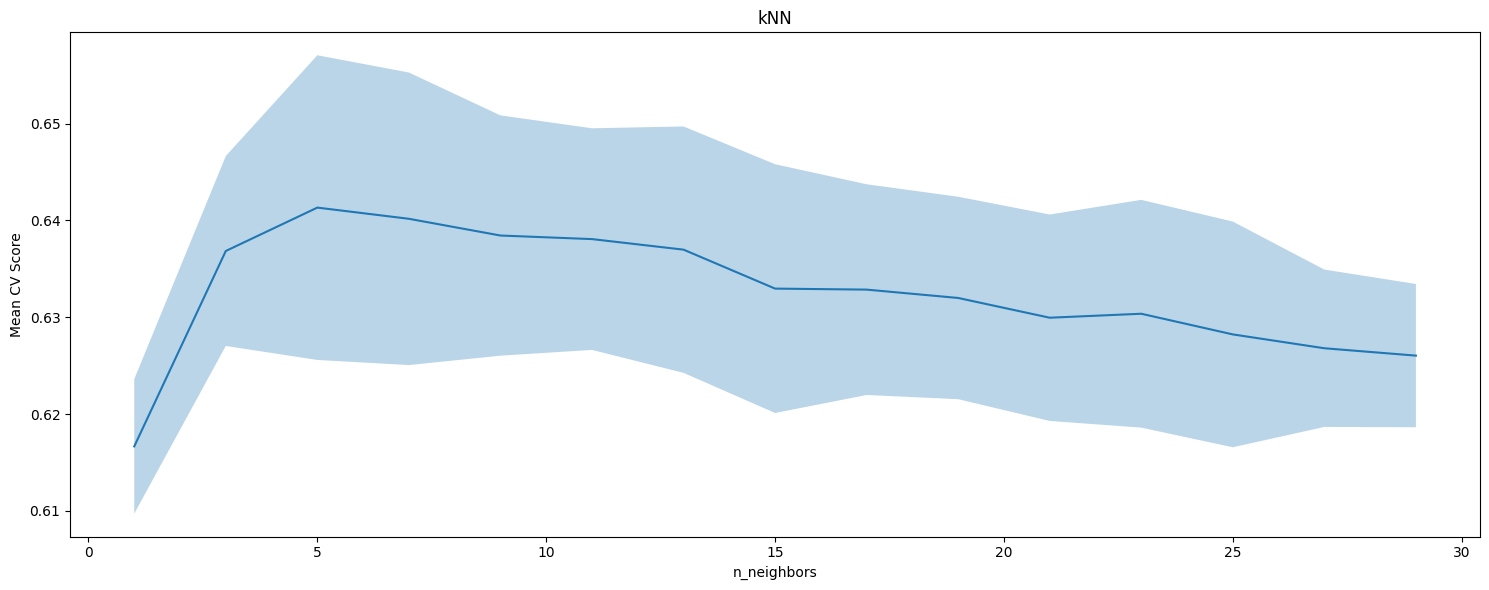

Best kNN params: {'n_neighbors': 5}, 0.6413189126335197


In [105]:
knn_params = {'n_neighbors': range(1, 30, 2)}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, scoring='roc_auc')
knn_grid.fit(X_num, y)

plot_results(knn_grid, 'n_neighbors', 'kNN')

print(f"Best kNN params: {knn_grid.best_params_}, {knn_grid.best_score_}")

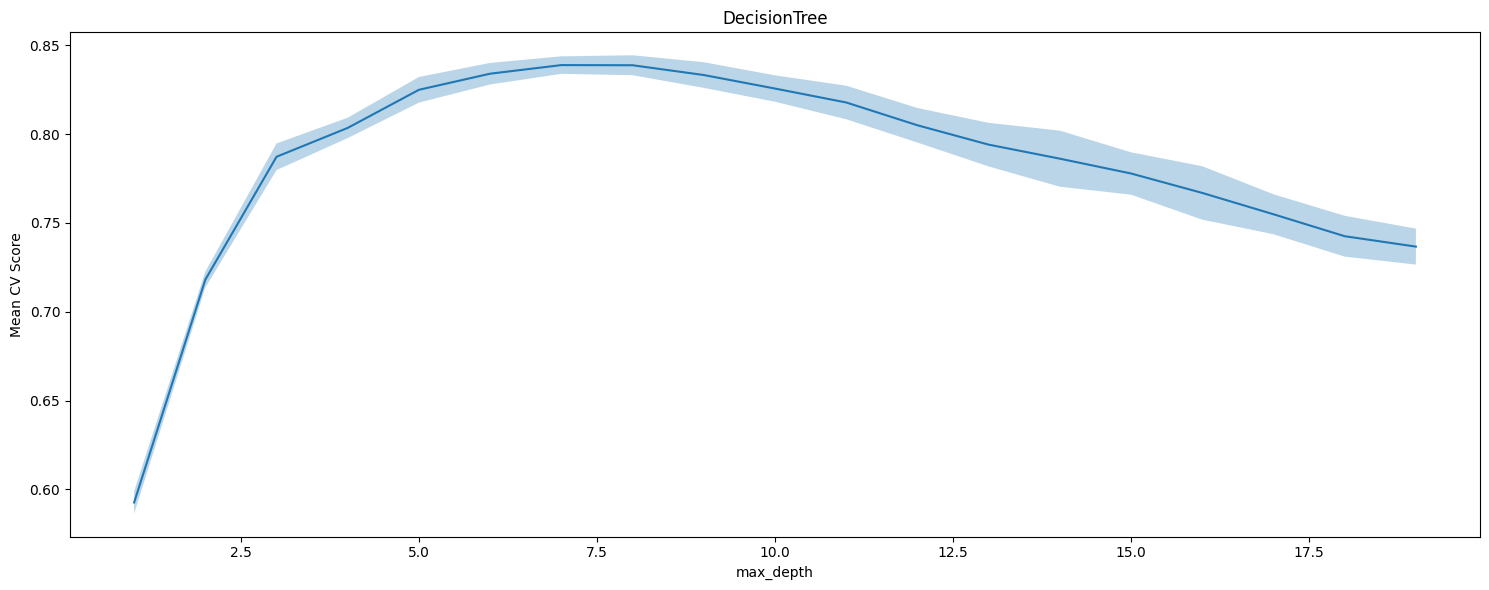

Best DecisionTree params: {'max_depth': 7}, 0.8389414038323448


In [106]:
tree_params = {'max_depth': range(1, 20)}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=cv, scoring='roc_auc')
tree_grid.fit(X_num, y)
plot_results(tree_grid, 'max_depth', 'DecisionTree')
print(f"Best DecisionTree params: {tree_grid.best_params_}, {tree_grid.best_score_}")

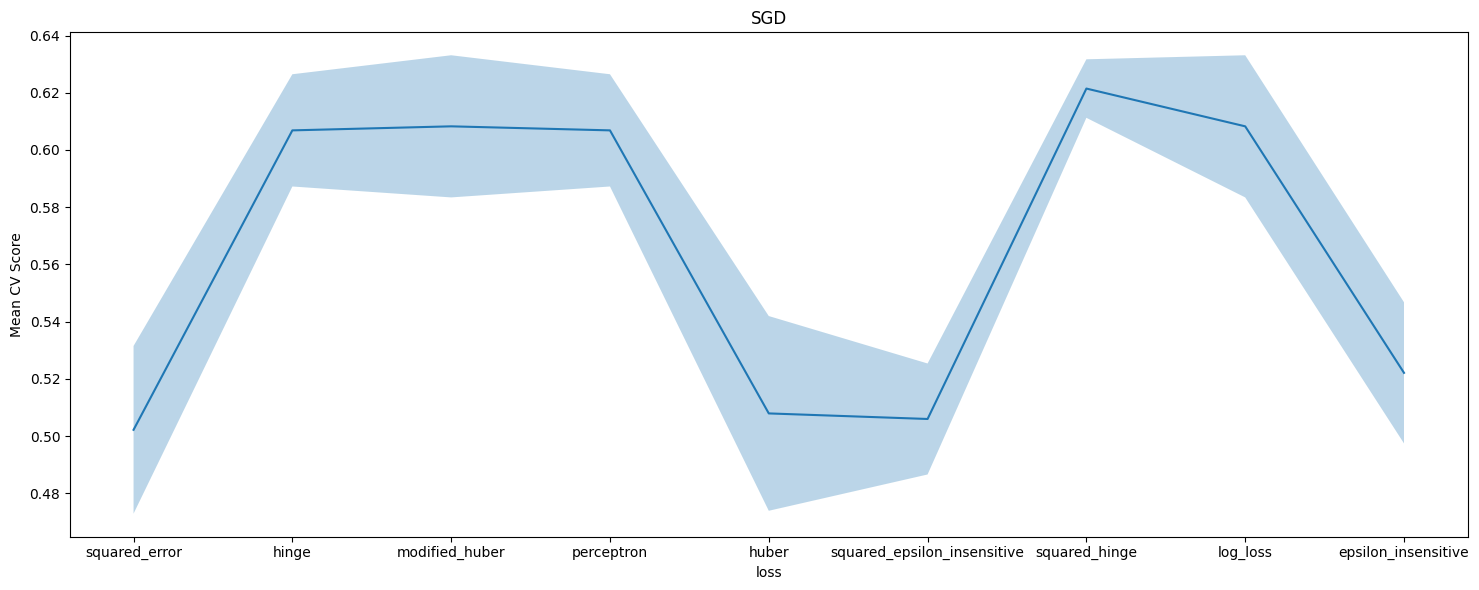

Best SGDClassifier params: {'loss': 'squared_hinge'}, 0.6214644578088684


In [107]:
sgd_params = {'loss': ['squared_error', 'hinge', 'modified_huber', 'perceptron', 'huber', 'squared_epsilon_insensitive', 'squared_hinge', 'log_loss', 'epsilon_insensitive']}

sgd_grid = GridSearchCV(SGDClassifier(random_state=42), sgd_params, cv=cv, scoring='roc_auc')
sgd_grid.fit(X_num, y)

plot_results(sgd_grid, 'loss', 'SGD')
print(f"Best SGDClassifier params: {sgd_grid.best_params_}, {sgd_grid.best_score_}")

Что вы можете сказать о получившихся графиках?

***Наиболее стабильный и высокий результат выдаёт tree, остальные классификаторы имеют очень большой разброс и низкую точность***

**Задание 3 (0.5 балла)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

100%|██████████| 300/300 [03:07<00:00,  1.60it/s]


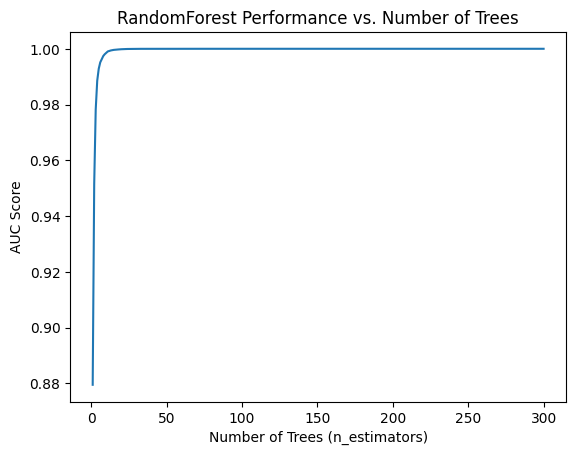

Best RandomForest params: 40, 0.9999860380503733


In [108]:
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier.fit(X_num, y)

scores = []

warnings.filterwarnings('ignore')

for i in tqdm(range(1, 301)):
    subset_predictions = np.array([tree.predict_proba(X_num)[:, 1] for tree in rf_classifier.estimators_[:i]]).mean(axis=0)
    score = roc_auc_score(y, subset_predictions)

    scores.append(score)

plt.plot(range(1, 301), scores)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('AUC Score')
plt.title('RandomForest Performance vs. Number of Trees')
plt.show()

print(f"Best RandomForest params: {40}, {scores[40]}")

**Задание 4 (0.5 балла)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

100%|██████████| 15/15 [02:40<00:00, 10.69s/it]


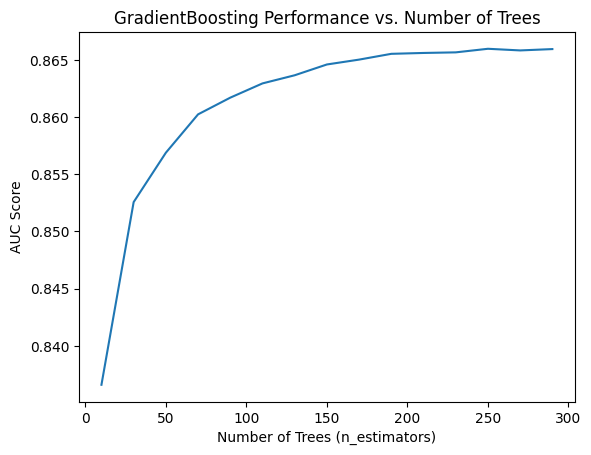

Best GradientBoosting params: 12, 0.8659889522156966


In [109]:
cv_scores = []
for n_estimators in tqdm(np.arange(10, 301, 20)):
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(gb_classifier, X_num, y, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())

plt.plot(np.arange(10, 301, 20), cv_scores)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('AUC Score')
plt.title('GradientBoosting Performance vs. Number of Trees')
plt.show()

print(f"Best GradientBoosting params: {np.argmax(cv_scores)}, {cv_scores[np.argmax(cv_scores)]}")

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

***Данные имеют разную размерность и не особо приятное распределение. Это может плохо повлиять на kNN, так как алгоритм учитывает расстояния между признаками, которые в абсолютном значении могут неравномерно влиять на результат алгоритма***

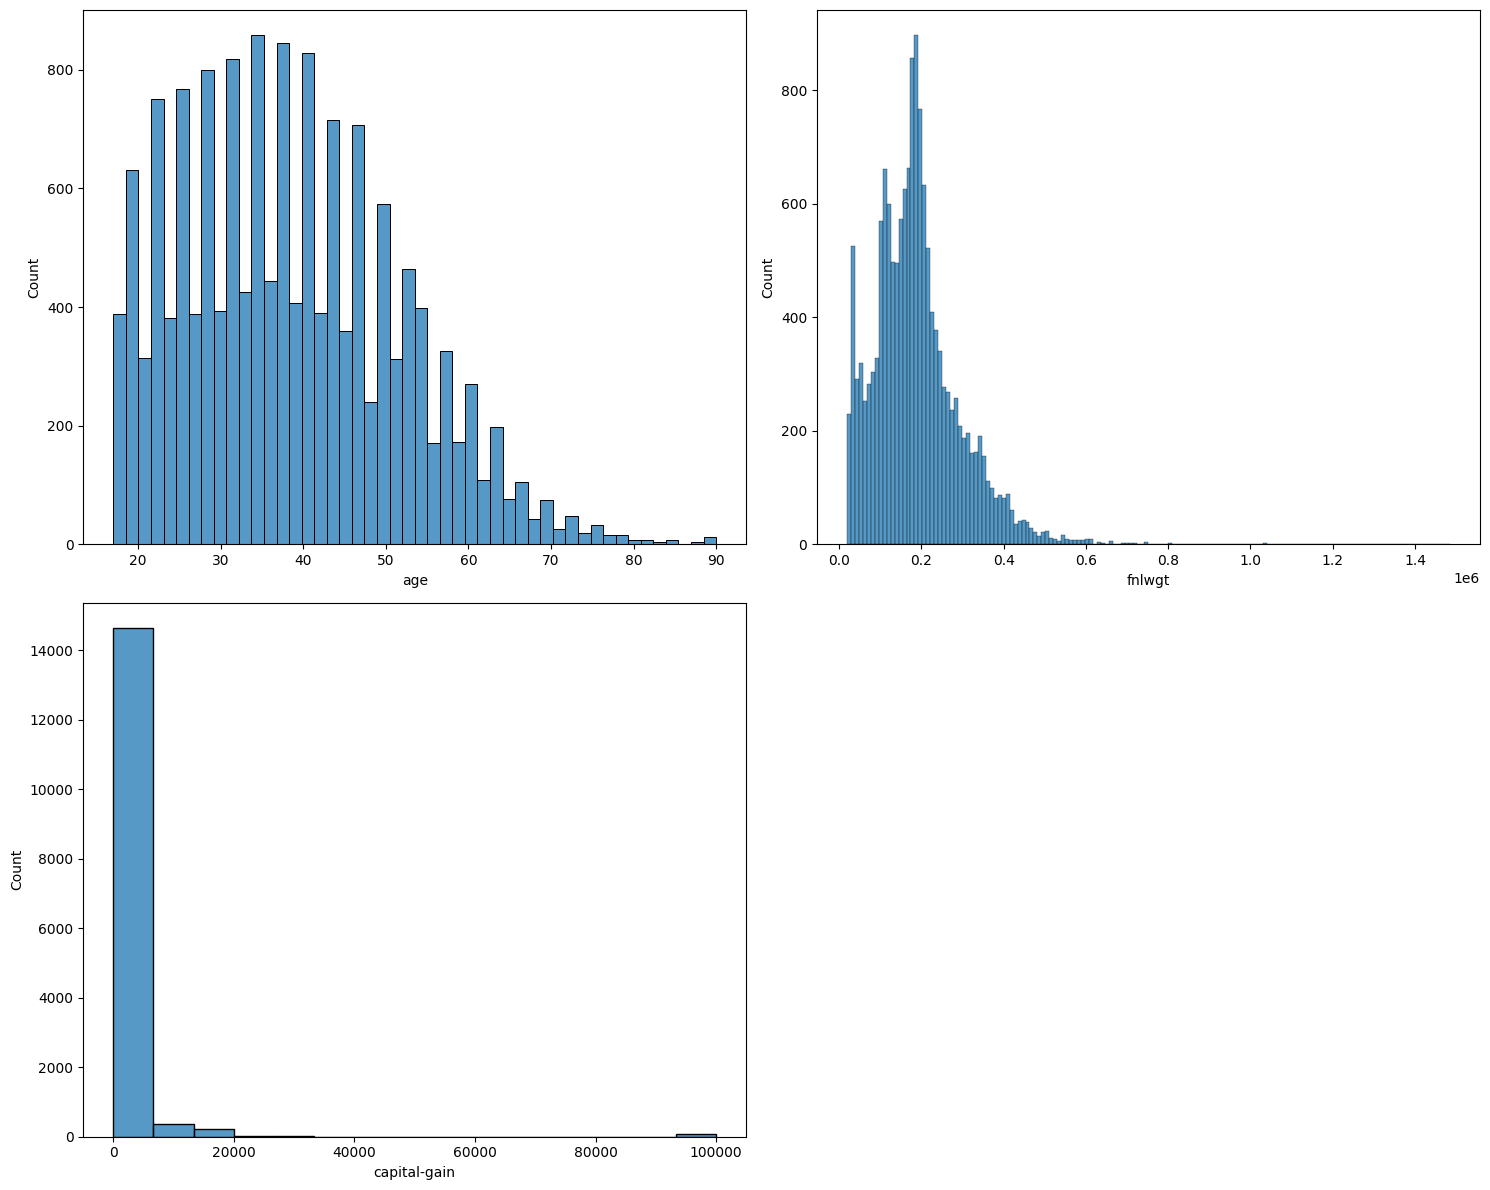

In [110]:
fig, ax = plt.subplots(figsize=(15, 12), nrows=2, ncols=2)
ax = ax.flatten()
sns.histplot(X_num['age'], ax=ax[0])
sns.histplot(X_num['fnlwgt'], ax=ax[1])
sns.histplot(X_num['capital-gain'], ax=ax[2])
ax[3].remove()
plt.tight_layout()
plt.show()

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задание 6 (1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
X_num_scaled = StandardScaler().fit_transform(X_num)

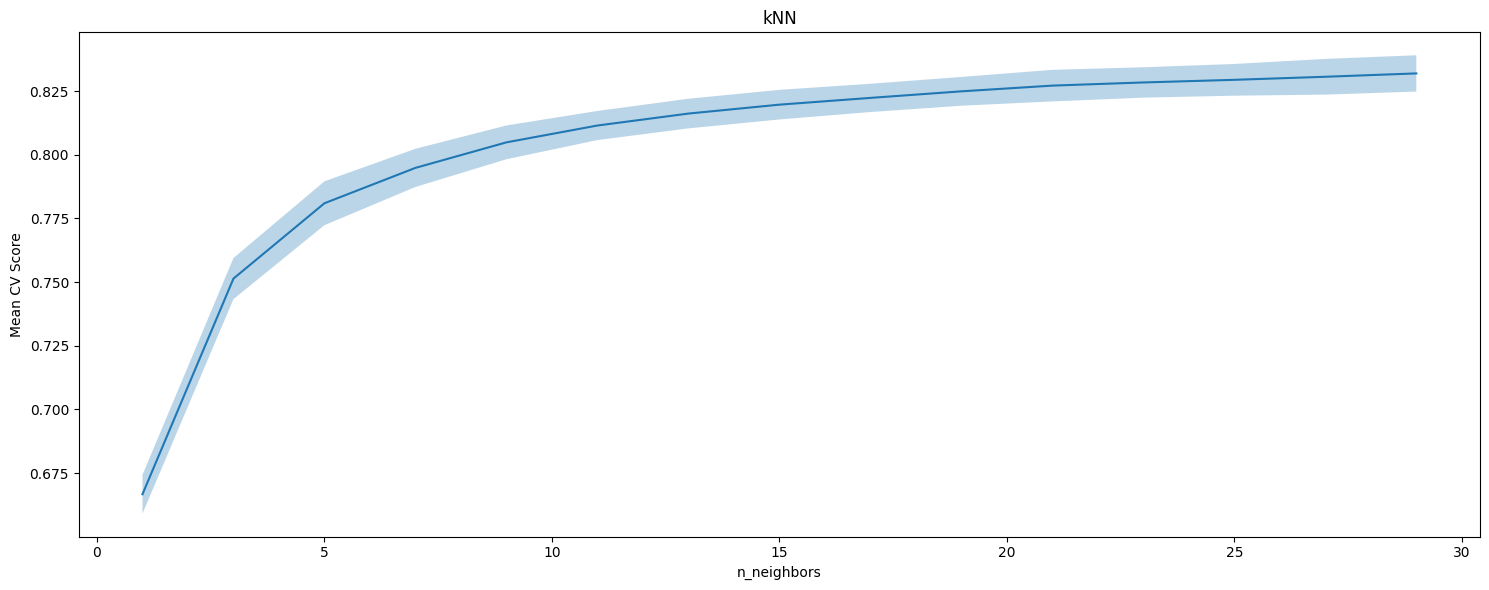

Best kNN params: {'n_neighbors': 29}, 0.8319138301606284


In [113]:
knn_params = {'n_neighbors': range(1, 30, 2)}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, scoring='roc_auc')
knn_grid.fit(X_num_scaled, y)

plot_results(knn_grid, 'n_neighbors', 'kNN')

print(f"Best kNN params: {knn_grid.best_params_}, {knn_grid.best_score_}")

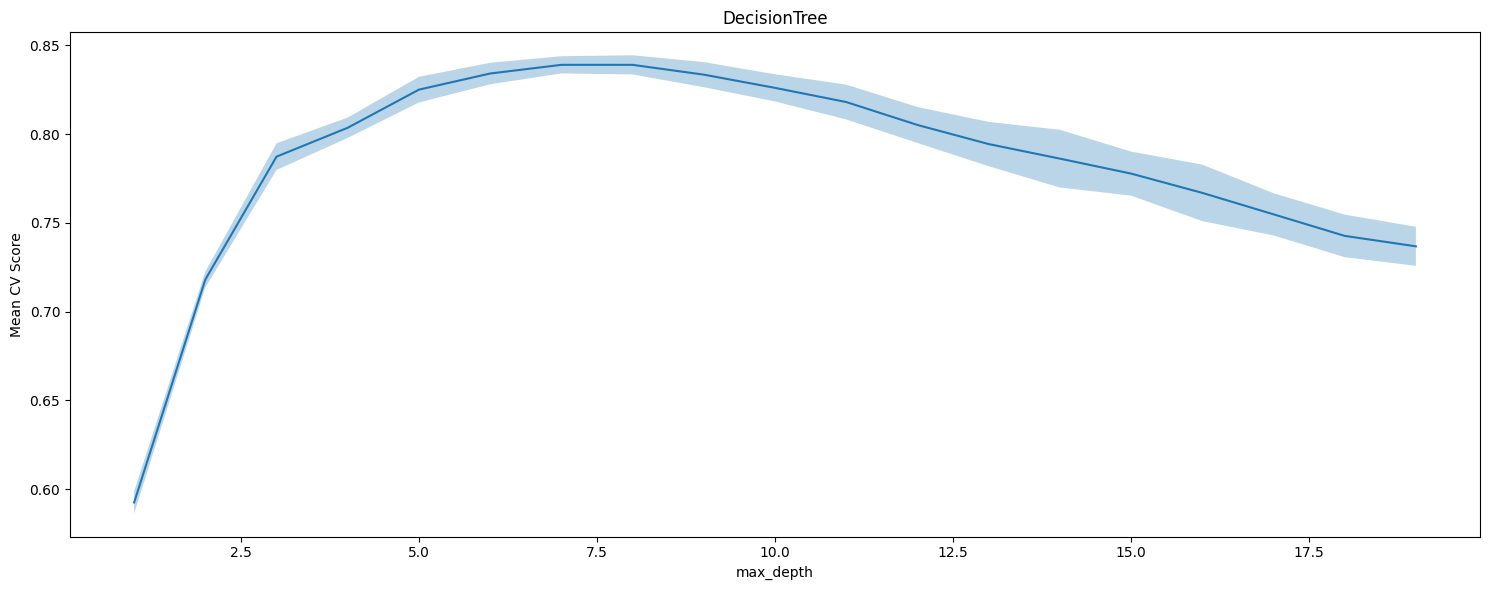

Best DecisionTree params: {'max_depth': 7}, 0.8389864678466404


In [114]:
tree_params = {'max_depth': range(1, 20)}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=cv, scoring='roc_auc')
tree_grid.fit(X_num_scaled, y)
plot_results(tree_grid, 'max_depth', 'DecisionTree')
print(f"Best DecisionTree params: {tree_grid.best_params_}, {tree_grid.best_score_}")

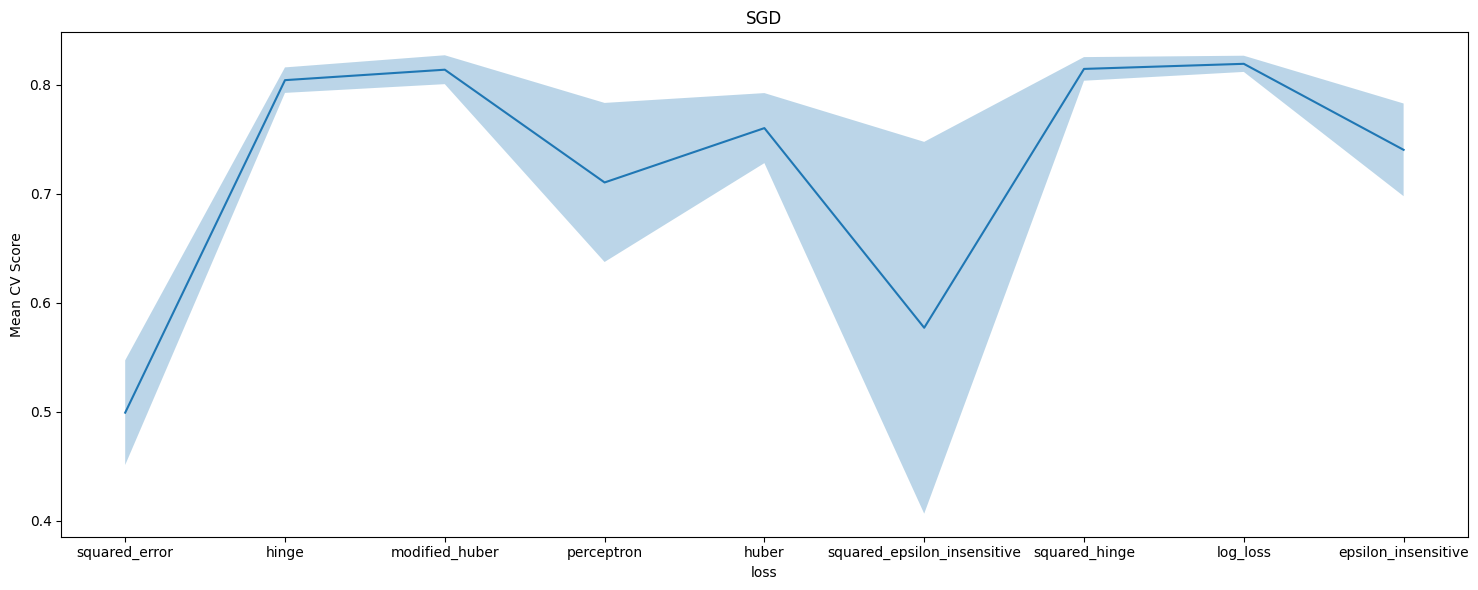

Best SGDClassifier params: {'loss': 'log_loss'}, 0.8191841358262731


In [115]:
sgd_params = {'loss': ['squared_error', 'hinge', 'modified_huber', 'perceptron', 'huber', 'squared_epsilon_insensitive', 'squared_hinge', 'log_loss', 'epsilon_insensitive']}

sgd_grid = GridSearchCV(SGDClassifier(random_state=42), sgd_params, cv=cv, scoring='roc_auc')
sgd_grid.fit(X_num_scaled, y)

plot_results(sgd_grid, 'loss', 'SGD')
print(f"Best SGDClassifier params: {sgd_grid.best_params_}, {sgd_grid.best_score_}")

100%|██████████| 300/300 [01:28<00:00,  3.38it/s]


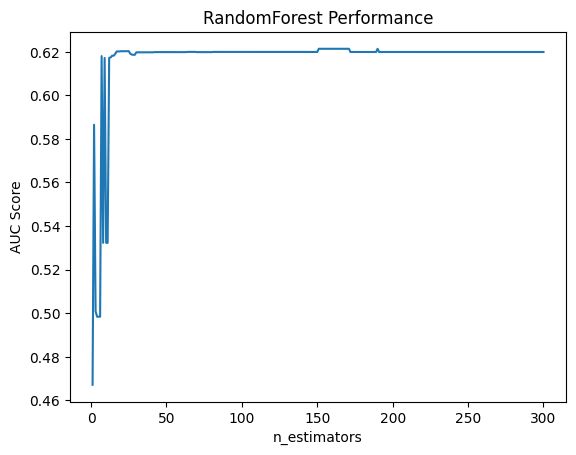

Best RandomForest params: 40, 0.6197622552542543


In [116]:
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier.fit(X_num_scaled, y)

scores = []

warnings.filterwarnings('ignore')

for i in tqdm(range(1, 301)):
    subset_predictions = np.array([tree.predict_proba(X_num)[:, 1] for tree in rf_classifier.estimators_[:i]]).mean(axis=0)
    score = roc_auc_score(y, subset_predictions)

    scores.append(score)

plt.plot(range(1, 301), scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC Score')
plt.title('RandomForest Performance')
plt.show()

print(f"Best RandomForest params: {40}, {scores[40]}")

100%|██████████| 15/15 [02:42<00:00, 10.86s/it]


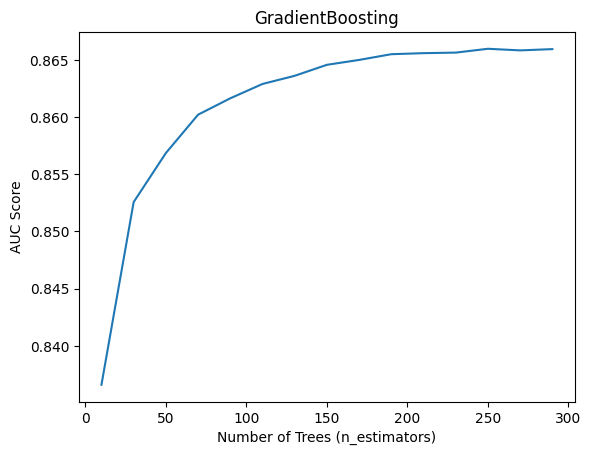

Best GradientBoosting params: 250, 0.8659891980631386


In [129]:
cv_scores = []
for n_estimators in tqdm(np.arange(10, 301, 20)):
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(gb_classifier, X_num_scaled, y, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())

plt.plot(np.arange(10, 301, 20), cv_scores)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('AUC Score')
plt.title('GradientBoosting')
plt.show()

print(f"Best GradientBoosting params: {np.arange(10, 301, 20)[np.argmax(cv_scores)]}, {cv_scores[np.argmax(cv_scores)]}")

Изменилось ли качество у некоторых алгоритмов?

***Сильно упало качество у случайного леса, в остальных моделях либо не ухудшилось, либо улучшилось (напр. kNN)***

**Задание 7 (1.25 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [122]:
knn_params = {'n_neighbors': range(1, 30, 3), 'metric': ['euclidean', 'manhattan', 'chebyshev']}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, scoring='roc_auc')
knn_grid.fit(X_num_scaled, y)

print(f"Best kNN params: {knn_grid.best_params_}, {knn_grid.best_score_}")

Best kNN params: {'metric': 'manhattan', 'n_neighbors': 28}, 0.8326923328800875


In [123]:
tree_params = {'max_depth': range(1, 20, 2), 'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=cv, scoring='roc_auc')
tree_grid.fit(X_num_scaled, y)

print(f"Best DecisionTree params: {tree_grid.best_params_}, {tree_grid.best_score_}")

Best DecisionTree params: {'criterion': 'gini', 'max_depth': 7}, 0.8389864678466404


In [125]:
sgd_params = {'loss': ['squared_error', 'hinge', 'modified_huber', 'perceptron', 'huber', 'squared_epsilon_insensitive', 'squared_hinge', 'log_loss', 'epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet']}

sgd_grid = GridSearchCV(SGDClassifier(random_state=42), sgd_params, cv=cv, scoring='roc_auc')
sgd_grid.fit(X_num_scaled, y)

print(f"Best SGDClassifier params: {sgd_grid.best_params_}, {sgd_grid.best_score_}")

Best SGDClassifier params: {'loss': 'log_loss', 'penalty': 'l2'}, 0.8191841358262731


In [130]:
warnings.filterwarnings('ignore')
rf_params = {'criterion': ['gini', 'entropy'], 'max_features': range(1, 11)}

rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=40, random_state=42), rf_params, cv=cv, scoring='roc_auc')
rf_grid.fit(X_num, y)

print(f"Best RandomForest params: {rf_grid.best_params_}, {rf_grid.best_score_}")

Best RandomForest params: {'criterion': 'entropy', 'max_features': 9}, 0.814314665830383


In [138]:
warnings.filterwarnings('ignore')
gdb_params = {'criterion': ['friedman_mse', 'squared_error'], 'max_features': range(1, 11)}

gdb_grid = GridSearchCV(GradientBoostingClassifier(n_estimators=250, random_state=42), gdb_params, cv=cv, scoring='roc_auc')
gdb_grid.fit(X_num_scaled, y)

print(f"Best RandomForest params: {gdb_grid.best_params_}, {gdb_grid.best_score_}")

Best RandomForest params: {'criterion': 'friedman_mse', 'max_features': 6}, 0.8658138516210137


Какой из алгоритмов имеет наилучшее качество?

***Наилучшее качество выдаёт градиентный бустинг, он же имеет самое долгое время обучения. Вероятно, это связано с вычислительной сложностью процесса град бустинга***

**Задание 8 (0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задание 9 (0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [140]:
X_cat_encoded = pd.get_dummies(X_cat)
X_cat_encoded.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


**Задание 10 (0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [143]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)
X_enh = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
X_enh.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,False,False,True,False,...,True,False,False,False,False,False,False,True,True,False
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True


Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

## Поиск новых полезных признаков

**Задание 11 (1.25 балла).** Попробуем улучшить качество модели, добавив в неё новые информативные признаки. Поступим так же, как действовали на [семинаре](https://github.com/Murcha1990/ML_Econom_2021-2022/blob/main/Семинары/Семинар%207/Seminar7.ipynb):
* добавьте к модели полиномиальных признаков степени 2 (для создания полиномиальных признаков используйте только исходные числовые признаки)
* затем снизьте размерность с помощью:
a) фильтрационных методов
b) жадного отбора признаков (RFE)
с) встроенного в модель метода отбора признаков.

Для каждого пункта выше выберите один метод и подберите для него оптимальные гиперпараметры, а также количество финальных признаков (по кросс-валидации).

* Затем можно добавить к модели закодированные в предыдущем пункте категориальные признаки.

Позволил ли этот подход улучшить качество моделей?

In [ ]:
#your code here

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 12 (1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [ ]:
#your code here

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**Задание 13 (1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберите тот, которых давал наилучшее качество на кросс-валидации (с учетом подобранных гиперпараметров) и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [ ]:
#your code here